In [1]:
# notebook to illustrate extracting topics using SVD

In [9]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [11]:
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/simple_test/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/shakespeare_macbeth/txt/", text_filename_pattern="macbeth_act_0?_scene_0?.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/mixed/txt/", text_filename_pattern="*.txt")
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/hillsborough/txt/", text_filename_pattern="*.txt")

content_directory =  data_sets/hillsborough/txt/
text_filename_pattern =  *.txt
self.documents populated =  19217


In [14]:
# load Englsh dictionary
dictionary_df = tmt.dictionary.get_dictionary_words("words.txt")
# a set is more efficient when checking for membership
dictionary_set = set(dictionary_df['words'].values.tolist())

In [15]:
# first clear index
tmt.index_wordcount.delete_index(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    #print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    #c = tmt.text_processing.keep_only_alphanumeric(b)
    
    # only keep alpha (not numeric) characters, removes punctuation
    c = tmt.text_processing.keep_only_alpha(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)
    
    # build n-grams
    #gl = tmt.word_processing.build_ngrams_from_words(dl,2)

    # remove stop words
    el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # only keep words with min length 5
    fl = tmt.word_processing.keep_words_min_length(el,5)
    
    # keep only words found in the Eglish dictionary
    gl = [word for word in fl if word in dictionary_set]
    
    # update index
    tmt.index_wordcount.create_wordcount_index_for_document(cr.content_directory, document_name, gl)
    
    pass

In [16]:
# merge document indices into a corpus index
tmt.index_wordcount.merge_wordcount_indices_for_corpus(cr.content_directory)

saving corpus word count index ...  data_sets/hillsborough/txt/index_wordcount.hdf5


In [17]:
# delete and build relevance index
tmt.index_relevance.delete_index(cr.content_directory)
tmt.index_relevance.calculate_relevance_index(cr.content_directory)

saving corpus relevance index ...  data_sets/hillsborough/txt/index_relevance.hdf5


In [18]:
# start here if you have already built the relevance index

In [19]:
# delete and rebuild SVD of doc-term matrix
tmt.svd.delete_svd(cr.content_directory)
tmt.svd.calculate_singular_value_decomposition(cr.content_directory)

saving singular value decomposition ...  data_sets/hillsborough/txt/svd.hdf5


In [20]:
# get SVD eigenvalues
eigenvalues = tmt.svd.get_svd_eigenvalues(cr.content_directory)

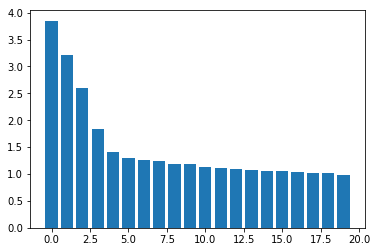

In [33]:
# visualise the SVD eigenvalues as a barchart to see most significant
tmt.visualisation.plot_bar_chart(eigenvalues[:20])

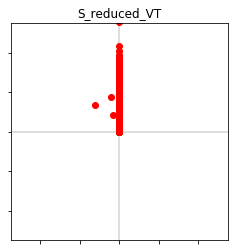

In [20]:
# get document-view projection onto 2 dimensions
document_view = tmt.svd.get_document_view(cr.content_directory)

# plot documents in reduced dimension space with a 2-d scatter 
tmt.visualisation.plot_scatter_chart(document_view)

In [21]:
document_view.T[document_view.T[1] < -0.006]

,0,1


In [34]:
# get top n topics, n is usually the same as key dimensions identified by the eigenvalue bar chart above
number_of_topics = 15
# how many words in each topic (the most significant)
topic_length = 10

topics_list = tmt.svd.get_topics(cr.content_directory, number_of_topics, topic_length)

In [35]:
for i, topic in enumerate(topics_list):
    print(" topic #", i)
    print(topic, "\n")
    pass

 topic # 0
raised          1.646954
actions         1.344083
document        1.159934
indexer         0.970770
instructions    0.953516
action          0.946094
indicated       0.901837
number          0.591718
statement       0.580177
receivers       0.508224
Name: 0, dtype: float64 

 topic # 1
reference     3.179260
extension     0.137096
telephone     0.114481
memorandum    0.113648
raised        0.110221
london        0.102715
scrutiny      0.097901
actions       0.089925
secretary     0.084932
queen         0.071101
Name: 1, dtype: float64 

 topic # 2
police        0.677746
ground        0.550280
material      0.545654
raised        0.396858
stand         0.350034
people        0.342326
south         0.333551
actions       0.311439
supporters    0.310529
there         0.298958
Name: 2, dtype: float64 

 topic # 3
secretary    0.572476
london       0.459885
justice      0.365538
material     0.355462
taylor       0.308684
ground       0.307226
inquiry      0.292526
disaster     0

In [ ]:
# indicator of topic significance by visualising the magnitude of the topic elements
x = tmt.svd.get_word_view(cr.content_directory,10)
x.abs().sum().plot()